In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pylab

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("Fraud.csv")

In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
# finding out the number of columns and row in this dataset
data.shape

(6362620, 11)

In [10]:
data.drop(['step'], axis='columns', inplace=True)

In [11]:
#comprises the number of columns, column labels, column data types, memory use, range index, and the number of cells in each column (non-null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [12]:
#data cleaning, checking for null values
data.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
#checking for duplicate values and dropping them
data.drop_duplicates(inplace=True)

In [14]:
#checking the new number of columns and rows after dropping duplicates nut the new value shows there is no duplicate in the dataset as well as there is no null value
data.shape

(6362620, 10)

In [15]:
#analysis begins by counting the number of transactions under the different types of transactions.
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

(array([2151495.,       0.,  532909.,       0.,       0., 2237500.,
              0.,   41432.,       0., 1399284.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

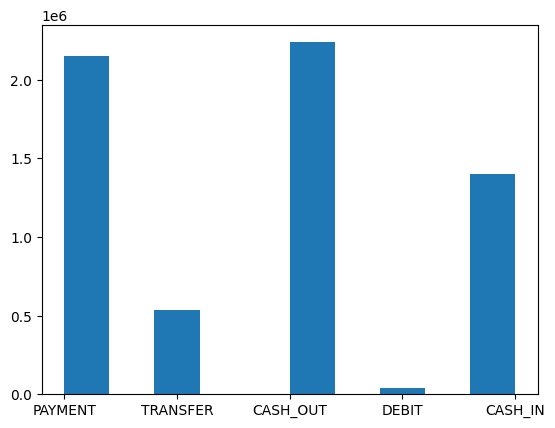

In [16]:
#analysis the data of number of transaction types on a bar chat
plt.hist(data['type'])

In [17]:
#identifying the transactions that are fraud or not
fraud_num = data['isFraud'].value_counts()
fraud_num

0    6354407
1       8213
Name: isFraud, dtype: int64

([<matplotlib.patches.Wedge at 0x1be08d1a500>,
 [Text(-1.099990955625572, 0.004460666087110192, '0'),
  Text(1.0999909559371663, -0.004460589247970448, '1')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87%'),
  Text(0.599995066874818, -0.002433048680711153, '0.13%')])

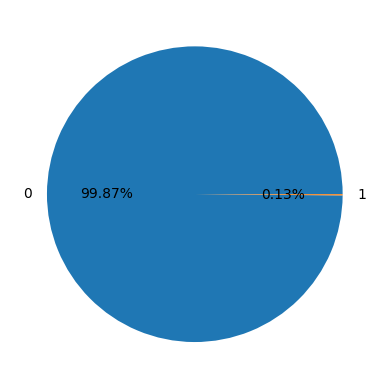

In [18]:
#representation of fraud num in a piechart
plt.pie(fraud_num,labels=fraud_num.keys(),autopct='%.2f%%')

In [19]:
#from the above pie chart only 0.13% is a  fraudulent transaction

data.nunique()

type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [20]:
data.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [22]:
data.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01
oldbalanceOrg,-0.00,1.00,1.00,0.07,0.04,0.01,0.00
newbalanceOrig,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00
oldbalanceDest,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00
newbalanceDest,0.46,0.04,0.04,0.98,1.00,0.00,-0.00
isFraud,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04
isFlaggedFraud,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00


<AxesSubplot: >

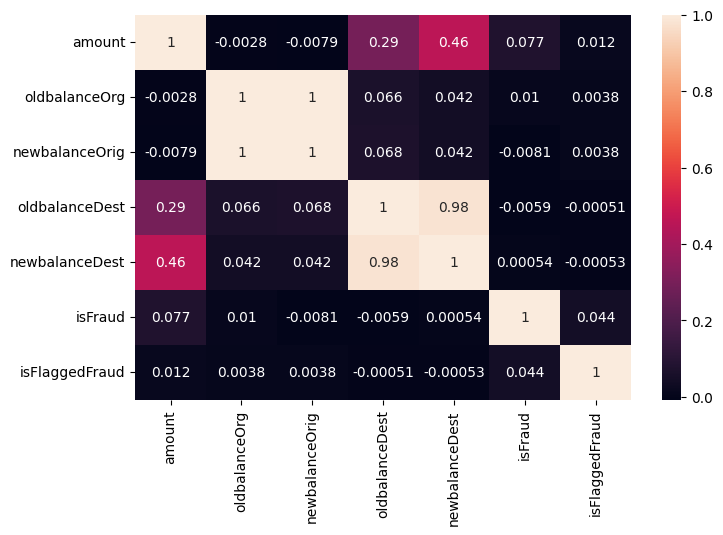

In [23]:
# oldbalanceOrg and newbalanceOrig , oldbalanceDest and newbalanceDest are correlated, their correlation coefficient is +/- 1.0.

plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in data.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    data[i] = encoder[i].fit_transform(data[i])

In [25]:
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0


In [26]:
x = data['type']
x.value_counts()

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

In [27]:
x = data.drop(columns=['isFraud'])
y = data['isFraud']
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state=0)
x,y = over_sample.fit_resample(x,y)
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [29]:
#scale the data features to a small range
from sklearn.preprocessing import MinMaxScaler
scaledSet = MinMaxScaler()
x = scaledSet.fit_transform(x)

In [30]:
#test and train the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [31]:
#applying logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = log_reg.predict(x_test)

In [33]:
import sklearn.metrics as metrics
print("Logistic Regression accuracy =", metrics.accuracy_score(y_pred, y_test))

Logistic Regression accuracy = 0.9175409722122044


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[1794508,  111467],
       [ 202920, 1703750]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92   1905975
           1       0.94      0.89      0.92   1906670

    accuracy                           0.92   3812645
   macro avg       0.92      0.92      0.92   3812645
weighted avg       0.92      0.92      0.92   3812645



In [36]:
test_data = np.array([3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0]).reshape(1,-1)
log_reg.predict(test_data)
print(log_reg.predict(test_data))

[0]


In [37]:
test_data = np.array([4,2134559968,1700,2000,3000,1245789306,1000.00,5.00,1]).reshape(1,-1)
log_reg.predict(test_data)
print(log_reg.predict(test_data))

[0]


In [38]:
import pickle
pickle.dump(log_reg, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

In [39]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred_dct = dec_tree.predict(x_test)
print("Decision Tree accuracy =", metrics.accuracy_score(y_pred_dct, y_test))

Decision Tree accuracy = 0.9993516312166488


In [41]:
confusion_matrix(y_test,y_pred_dct)

array([[1904188,    1787],
       [    685, 1905985]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred_dct))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1905975
           1       1.00      1.00      1.00   1906670

    accuracy                           1.00   3812645
   macro avg       1.00      1.00      1.00   3812645
weighted avg       1.00      1.00      1.00   3812645

